In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
import os
rootdir = './80-90output/'
list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
ds = xr.open_dataset(rootdir+list[0],decode_times=False)

In [3]:
temp = ds['ts'][0, 0]
for i in range(1,len(list)):
    try:
        ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    except:
        continue
    temp = temp + ds['ts'][0, 0]
temp = temp/len(list)

In [4]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
ds['su']

<xarray.DataArray 'su' (time: 1, lat: 115, lon: 182)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -72.0 -74.0 -76.0 -78.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 354.0 356.0 358.0 360.0 362.0
  * time     (time) float64 1.041e+03
Attributes:
    long_name:  Uwindstress
    units:      Pa

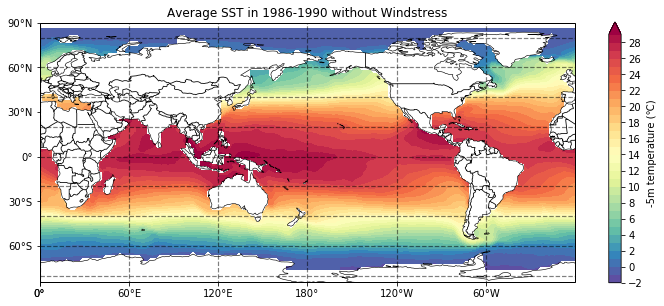

In [31]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': '-5m temperature (℃)',
   'shrink': 0.6,
   'ticks': np.arange(-2,30,2)
}
levels = np.arange(-2,30,1)
temp.plot.contourf(ax=ax, levels=levels, cmap='Spectral_r', 
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("Average SST in 1986-1990 without Windstress")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('Wind_sst8690.png')
fig.show()

In [32]:
#make Ctrl_Temp ready
ctrl_temp = np.loadtxt('Ctrl_86-90Temp.csv',delimiter=',')
lon = ds['ts'].coords['lon'].values #182 (0,362,2) !!!! 2,362
lat = ds['ts'].coords['lat'].values #115 (90,-78,2)
lev = ds['ts'].coords['lev'].values #115 (90,-78,2)

In [33]:
dtemp =  temp.values - ctrl_temp
Dtemp = xr.DataArray(dtemp,coords=[lat,lon],dims=['Latitude','Longetide'])

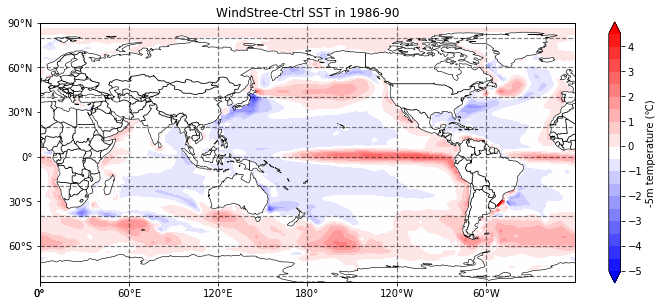

In [34]:
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': '-5m temperature (℃)',
   'shrink': 0.6,
   'ticks': np.arange(-5,5,1)
}
levels = np.arange(-5,5,0.5)
Dtemp.plot.contourf(ax=ax, levels=levels, cmap='bwr', #Spectral_r  vlag   RdYlBu_r
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("WindStree-Ctrl SST in 1986-90")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('Windsstdel86-90.png')
fig.show()

### surface zonal current

In [5]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
S_us = ds['us'][0, 0]
for i in range(1,len(list)):
    try:
        ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    except:
        continue
    S_us = S_us + ds['us'][0, 0]
S_us = S_us/len(list)

In [12]:
ctrl_Su = np.loadtxt('Ctrl_86-90Sus.csv',delimiter=',')
ctrl_su = xr.DataArray(ctrl_Su,coords=[lat,lon],dims=['Latitude','Longetide'])
dsu =  S_us.values - ctrl_Su
Dsu = xr.DataArray(dsu,coords=[lat,lon],dims=['Latitude','Longetide'])

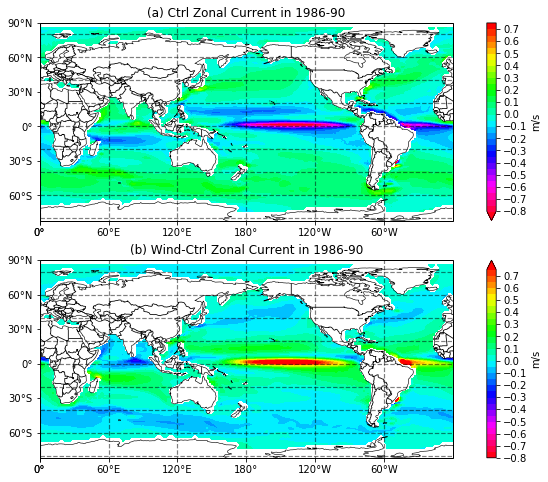

In [30]:
#proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面

ax1 = fig.add_subplot(2,1,1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax1.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl1.xlabels_top = False #关闭顶端标签
gl1.ylabels_right = False #关闭右侧标签
gl1.xlabels_bottom = False
gl1.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'm/s',
#   'shrink': 0.8,
   'ticks': np.arange(-0.8,0.8,0.1)
}
levels = np.arange(-0.8,0.8,0.05)
ctrl_su.plot.contourf(ax=ax1, levels=levels, cmap='hsv_r',  #gist_rainbow_r
     cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax1.set_title("(a) Ctrl Zonal Current in 1986-90")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)



################### 2

ax = fig.add_subplot(2,1,2, projection=ccrs.PlateCarree(central_longitude=180))  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'm/s',
#   'shrink': 0.8,
   'ticks': np.arange(-0.8,0.8,0.1)
}
levels = np.arange(-0.8,0.8,0.05)
Dsu.plot.contourf(ax=ax, levels=levels, cmap='hsv_r',  #gist_rainbow_r
     cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("(b) Wind-Ctrl Zonal Current in 1986-90")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('Wind_ZC1986-90.png')
fig.show()

# 盐度通量实验表面积计算

In [5]:
lon

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198., 200., 202., 204., 206., 208., 210., 212., 214., 216., 218.,
       220., 222., 224., 226., 228., 230., 232., 234., 236., 238., 240.,
       242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284.,
       286., 288., 290., 292., 294., 296., 298., 30

In [7]:
lat

array([ 90.,  88.,  86.,  84.,  82.,  80.,  78.,  76.,  74.,  72.,  70.,
        68.,  66.,  64.,  62.,  60.,  58.,  56.,  54.,  52.,  50.,  48.,
        46.,  44.,  42.,  40.,  38.,  36.,  34.,  32.,  30.,  29.,  28.,
        27.,  26.,  25.,  24.,  23.,  22.,  21.,  20.,  19.,  18.,  17.,
        16.,  15.,  14.,  13.,  12.,  11.,  10.,   9.,   8.,   7.,   6.,
         5.,   4.,   3.,   2.,   1.,   0.,  -1.,  -2.,  -3.,  -4.,  -5.,
        -6.,  -7.,  -8.,  -9., -10., -11., -12., -13., -14., -15., -16.,
       -17., -18., -19., -20., -21., -22., -23., -24., -25., -26., -27.,
       -28., -29., -30., -32., -34., -36., -38., -40., -42., -44., -46.,
       -48., -50., -52., -54., -56., -58., -60., -62., -64., -66., -68.,
       -70., -72., -74., -76., -78.], dtype=float32)

In [13]:
print(len(lat[10:21]))
lat[10:21]

11


array([70., 68., 66., 64., 62., 60., 58., 56., 54., 52., 50.],
      dtype=float32)

In [21]:
print(len(lon[-42:-1]))
lon[-42:-1]

41


array([280., 282., 284., 286., 288., 290., 292., 294., 296., 298., 300.,
       302., 304., 306., 308., 310., 312., 314., 316., 318., 320., 322.,
       324., 326., 328., 330., 332., 334., 336., 338., 340., 342., 344.,
       346., 348., 350., 352., 354., 356., 358., 360.], dtype=float32)

In [4]:
sali = ds['ss'][0, 0]

In [5]:
str1 = str(sali[10:21,-42:-1].values)

In [6]:
str1.count('nan')

156

In [7]:
str2 = str(sali[10:21,0:8].values)
str2.count('nan')

36

In [34]:
sali[10:21,-42:-1]

<xarray.DataArray 'ss' (lat: 11, lon: 41)>
array([[      nan,       nan,       nan, ..., 34.02607 , 34.163258, 34.311916],
       [      nan,       nan,       nan, ..., 34.078533, 34.214817, 34.315865],
       [      nan,       nan,       nan, ..., 34.10533 , 34.299675, 34.624184],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan, 34.798893],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 70.0 68.0 66.0 64.0 62.0 ... 58.0 56.0 54.0 52.0 50.0
  * lon      (lon) float32 280.0 282.0 284.0 286.0 ... 354.0 356.0 358.0 360.0
    lev      float32 -5.0
    time     float64 1.07e+03
Attributes:
    long_name:  salinity
    units:      psu

In [14]:
11*41+11*8 - (156+36) #number of nun-nan

347

In [39]:
(20*111)/2*(np.cos(1/9*np.pi)*80*111 + 80 * 111)

0.9396926207859084

In [11]:
S = (25*111)/2*(np.cos(5/18*np.pi)*95*111 + np.cos(7/18*np.pi)*95 * 111)*1000000
S

14408906885775.307

In [12]:
S1 = S * 347/539
S1   # 9.4*10^12   

9276235045202.283

In [13]:
0.1*1000*35/S1

3.773082487609257e-10

In [59]:
len(lon)

182

In [67]:
len(lat)

115

In [60]:
sali[10:21,140:181]

<xarray.DataArray 'ss' (lat: 11, lon: 41)>
array([[      nan,       nan,       nan, ..., 34.02607 , 34.163258, 34.311916],
       [      nan,       nan,       nan, ..., 34.078533, 34.214817, 34.315865],
       [      nan,       nan,       nan, ..., 34.10533 , 34.299675, 34.624184],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan, 34.798893],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 70.0 68.0 66.0 64.0 62.0 ... 58.0 56.0 54.0 52.0 50.0
  * lon      (lon) float32 280.0 282.0 284.0 286.0 ... 354.0 356.0 358.0 360.0
    lev      float32 -5.0
    time     float64 1.07e+03
Attributes:
    long_name:  salinity
    units:      psu

In [70]:
sali[10:21,0:8]

<xarray.DataArray 'ss' (lat: 11, lon: 8)>
array([[34.311916, 34.463905, 34.58643 , 34.670273, 34.727833, 34.74865 ,
        34.705677, 34.674744],
       [34.315865, 34.449604, 34.73198 , 34.82428 , 34.81952 , 34.73946 ,
        34.326523, 34.026848],
       [34.624184, 34.856037, 35.04283 , 35.037624, 34.980194, 34.714672,
        34.020786,       nan],
       [34.906277, 35.106415, 35.174995, 35.064598, 34.26001 , 32.56688 ,
              nan,       nan],
       [35.319298, 35.313763, 34.887413,       nan,       nan,       nan,
              nan,       nan],
       [35.38713 , 35.302757, 35.047245,       nan,       nan,       nan,
              nan,       nan],
       [35.12228 , 35.004208, 34.215878, 33.433846, 32.77167 ,       nan,
              nan,       nan],
       [34.922688, 34.648003, 34.278263, 33.766506, 32.911045,       nan,
              nan,       nan],
       [34.798893, 34.535988, 34.100666, 33.5066  , 31.79609 ,       nan,
              nan,       nan],
       [      nan, 34.25043 , 33.802505,       nan,       nan,       nan,
              nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 70.0 68.0 66.0 64.0 62.0 ... 58.0 56.0 54.0 52.0 50.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0
    lev      float32 -5.0
    time     float64 1.07e+03
Attributes:
    long_name:  salinity
    units:      psu

In [58]:
lat[0:29]

array([90., 88., 86., 84., 82., 80., 78., 76., 74., 72., 70., 68., 66.,
       64., 62., 60., 58., 56., 54., 52., 50., 48., 46., 44., 42., 40.,
       38., 36., 34.], dtype=float32)

## 正压流函数bsf

In [4]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
bsf = ds['bsf'][0] 
for i in range(1,len(list)):
    try:
        ds = xr.open_dataset(rootdir+list[i],decode_times=False)
        bsf = bsf + ds['bsf'][0]
    except:
        continue
bsf = bsf/len(list)

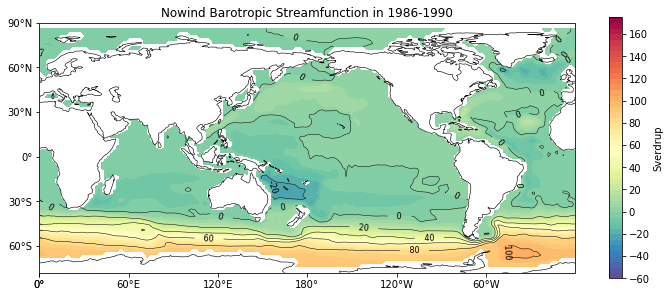

In [8]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
#ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#      linewidth=1.2, color='k', alpha=0.5, linestyle='--')
# gl.xlabels_top = False #关闭顶端标签
# gl.ylabels_right = False #关闭右侧标签
# gl.xlabels_bottom = False
# gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'Sverdrup',
   'shrink': 0.6,
   'ticks': np.arange(-60,180,20)
}
levels = np.arange(-60,180,5)
filled_c = bsf.plot.contourf(ax=ax, levels=levels, cmap='Spectral_r',
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())

# Add black line contours.
plt.rcParams['contour.negative_linestyle'] = 'dashed'
levelc = np.arange(-60,160,20)
line_c = bsf.plot.contour(ax=ax, levels=levelc, colors=['black'],linewidths=0.5,
                         transform=ccrs.PlateCarree())

 # Use the line contours to place contour labels.
ax.clabel(
    line_c,  # Typically best results when labelling line contours.
    colors=['black'],
    fontsize=8,
    manual=False,  # Automatic placement vs manual placement.
    inline=True,  # Cut the line where the label will be placed.
    fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
)

ax.set_title("Nowind Barotropic Streamfunction in 1986-1990")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('Wind1986-90bsf.png')
fig.show()

# Equatorial Sea Water Temperature (2° N，2° S)

In [10]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
temp = ds['ts'][0]
for i in range(1,len(list)):
    try:
        ds = xr.open_dataset(rootdir+list[i],decode_times=False)
        temp = temp + ds['ts'][0]
    except:
        continue
temp = temp/len(list)

In [12]:
lon = ds['ts'].coords['lon'].values #182 (0,362,2) !!!! 2,362
lat = ds['ts'].coords['lat'].values #115 (90,-78,2)
lev = ds['ts'].coords['lev'].values #115 (90,-78,2)

In [13]:
ver_Temp = []
for i in range(len(lev)):
    zonal_temp = [] 
    itemp = temp[i]
    for j in range(len(lon)-1):#层内纬度平均  # lon - 1 cycle 
        zonal_temp.append(np.nanmean(itemp[58:63,j+1].values,axis=0)) # j:lon 2：362; lat[58:63]=[-2,2]
    ver_Temp.append(zonal_temp)
ver_Temp = np.array(ver_Temp)

/usr/local/anaconda3/envs/pychong/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [14]:
lon=lon[1:]
ver_temp = xr.DataArray(ver_Temp,coords=[lev,lon],dims=['Depth','Longitude'])
#ver_temp.coords['lon'].attrs['units'] = 'degree_west'
ver_temp.coords['Depth'].attrs['units'] = 'm'

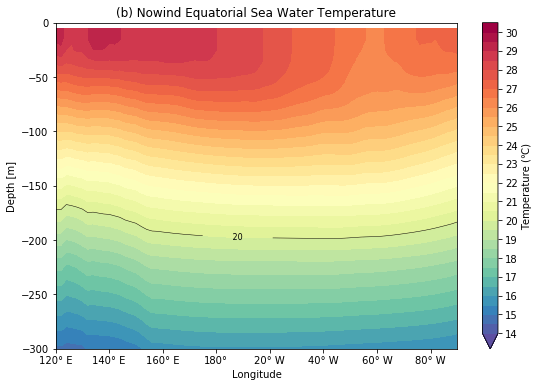

In [17]:
#plot
fig, ax = plt.subplots(figsize=(9,6))
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'Temperature (℃)',
  # 'shrink': 0.8,
   'ticks': np.arange(14,31,1)
}
levels = np.arange(14,31,0.5)
ver_temp.plot.contourf(ax=ax, levels=levels, cbar_kwargs=cbar_kwargs, cmap='Spectral_r')

# Add black line contours.
plt.rcParams['contour.negative_linestyle'] = 'dashed'
line_c = ver_temp.plot.contour(ax=ax, levels=[20], colors=['black'],linewidths=0.5)

 # Use the line contours to place contour labels.
ax.clabel(
    line_c,  # Typically best results when labelling line contours.
    colors=['black'],
    fontsize=8,
    manual=False,  # Automatic placement vs manual placement.
    inline=True,  # Cut the line where the label will be placed.
    fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
)


ax.set_ylim(-300,0)
ax.set_xlim(120,270)
#cs = ax.contourf(LAT, LEV, ver_Temp, levels=levels, cmap='Spectral_r')
#cbar = fig.colorbar(cs)
ax.set_title("(b) Nowind Equatorial Sea Water Temperature")  # Add a title to the axes.
tick = ['120° E','140° E','160° E','180°','20° W','40° W','60° W','80° W','100° W']
ax.set_xticklabels(tick)

plt.savefig('Wind22Temp1986-90.png')
plt.show()